In [ ]:
edgelist = [['Mannheim', 'Frankfurt', 85], 
            ['Mannheim', 'Karlsruhe', 80], 
            ['Erfurt', 'Wurzburg', 186], 
            ['Munchen', 'Numberg', 167], 
            ['Munchen', 'Augsburg', 84], 
            ['Munchen', 'Kassel', 502], 
            ['Numberg', 'Stuttgart', 183], 
            ['Numberg', 'Wurzburg', 103], 
            ['Numberg', 'Munchen', 167], 
            ['Stuttgart', 'Numberg', 183],
            ['Augsburg', 'Munchen', 84], 
            ['Augsburg', 'Karlsruhe', 250], 
            ['Kassel', 'Munchen', 502], 
            ['Kassel', 'Frankfurt', 173],
            ['Frankfurt', 'Mannheim', 85], 
            ['Frankfurt', 'Wurzburg', 217], 
            ['Frankfurt', 'Kassel', 173], 
            ['Wurzburg', 'Numberg', 103], 
            ['Wurzburg', 'Erfurt', 186], 
            ['Wurzburg', 'Frankfurt', 217], 
            ['Karlsruhe', 'Mannheim', 80], 
            ['Karlsruhe', 'Augsburg', 250],
            ["Mumbai", "Delhi",400],
            ["Delhi", "Kolkata",500],
            ["Kolkata", "Bangalore",600],
            ["TX", "NY",1200],
            ["ALB", "NY",800]]

In [ ]:
import networkx as nx

In [ ]:
g = nx.Graph()
for edge in edgelist:
    g.add_edge(edge[0],edge[1], weight = edge[2])


In [ ]:
for i, x in enumerate(nx.connected_components(g)):
    print("cc"+str(i)+":",x)

In [ ]:
print(nx.shortest_path(g, 'Stuttgart','Frankfurt',weight='weight'))
print(nx.shortest_path_length(g, 'Stuttgart','Frankfurt',weight='weight'))

In [ ]:
for x in nx.all_pairs_dijkstra_path(g, weight='weight'):
    print(x)

In [ ]:
# nx.minimum_spanning_tree(g) returns a instance of type graph
nx.draw_networkx(nx.minimum_spanning_tree(g))

In [1]:
import networkx as nx
# reading the dataset
fb = nx.read_edgelist('input/facebook-combined.txt', create_using = nx.Graph(), nodetype = int)

In [2]:
import matplotlib.pyplot as plt

pos = nx.spring_layout(fb)
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (20, 15)
plt.axis('off')
nx.draw_networkx(fb, pos, with_labels = False, node_size = 35)
plt.show()

<Figure size 2000x1500 with 1 Axes>

In [3]:
pageranks = nx.pagerank(fb)
print(pageranks)

{236: 0.00040273350777135687, 186: 0.0004584102760849686, 122: 0.0006583530605460558, 285: 0.0005090717031199382, 24: 0.0002166496571972657, 346: 0.0003554045173795468, 271: 0.0007410822505710922, 304: 0.0005718369216881563, 176: 0.00016440973923707774, 9: 0.0005951186169770776, 130: 0.0002258138004064847, 329: 0.0004175758949696838, 204: 0.00028833486803640253, 213: 0.0004424314012934176, 252: 0.0006659517516172068, 332: 0.0004747855984722756, 82: 0.00037682838697575705, 65: 0.00014738472947502384, 276: 0.00020222398863861075, 26: 0.0006871409321492673, 280: 0.0004943116294975165, 272: 0.0004971343797290029, 211: 0.0003184396910876556, 199: 0.000491966060350841, 84: 0.0001885008002631856, 133: 0.0002397965981560319, 62: 0.00028433957785981066, 239: 0.0006318113245748385, 172: 0.0004318536497658858, 322: 0.0007955678183009376, 53: 0.0004169383655038068, 3: 0.00022336711537103987, 170: 0.0005177426983249756, 175: 0.0004882885529796974, 46: 0.00014807670502753643, 56: 0.00080356951777076

In [4]:
import operator
sorted_pagerank = sorted(pageranks.items(), key=operator.itemgetter(1),reverse = True)
print(sorted_pagerank)

[(483, 0.0013599133699007315), (3830, 0.001344712983637226), (2313, 0.0009589781687839357), (376, 0.0009407023103604414), (2047, 0.0009130312315135463), (25, 0.0008304997705713243), (428, 0.000824312558770473), (828, 0.0008225679328783261), (475, 0.00081384581561758), (56, 0.0008035695177707603), (713, 0.0008004654101467428), (563, 0.0007962713502904459), (322, 0.0007955678183009376), (3596, 0.0007949357034193668), (917, 0.0007823127936733765), (119, 0.0007789660623617493), (67, 0.0007691566193893668), (3938, 0.0007516860513185362), (3545, 0.0007501788729766726), (271, 0.0007410822505710922), (277, 0.0007347411483125703), (3604, 0.0007297281072696944), (3918, 0.0007246848376345666), (3521, 0.0007167615744546169), (2951, 0.0007165083564460057), (1888, 0.000713986759484675), (705, 0.000709195558438081), (1800, 0.0007016685520003213), (3101, 0.0006990632389889727), (637, 0.0006940187495770336), (3291, 0.0006932710003326877), (412, 0.0006925249491098433), (1783, 0.0006913325901728572), (21

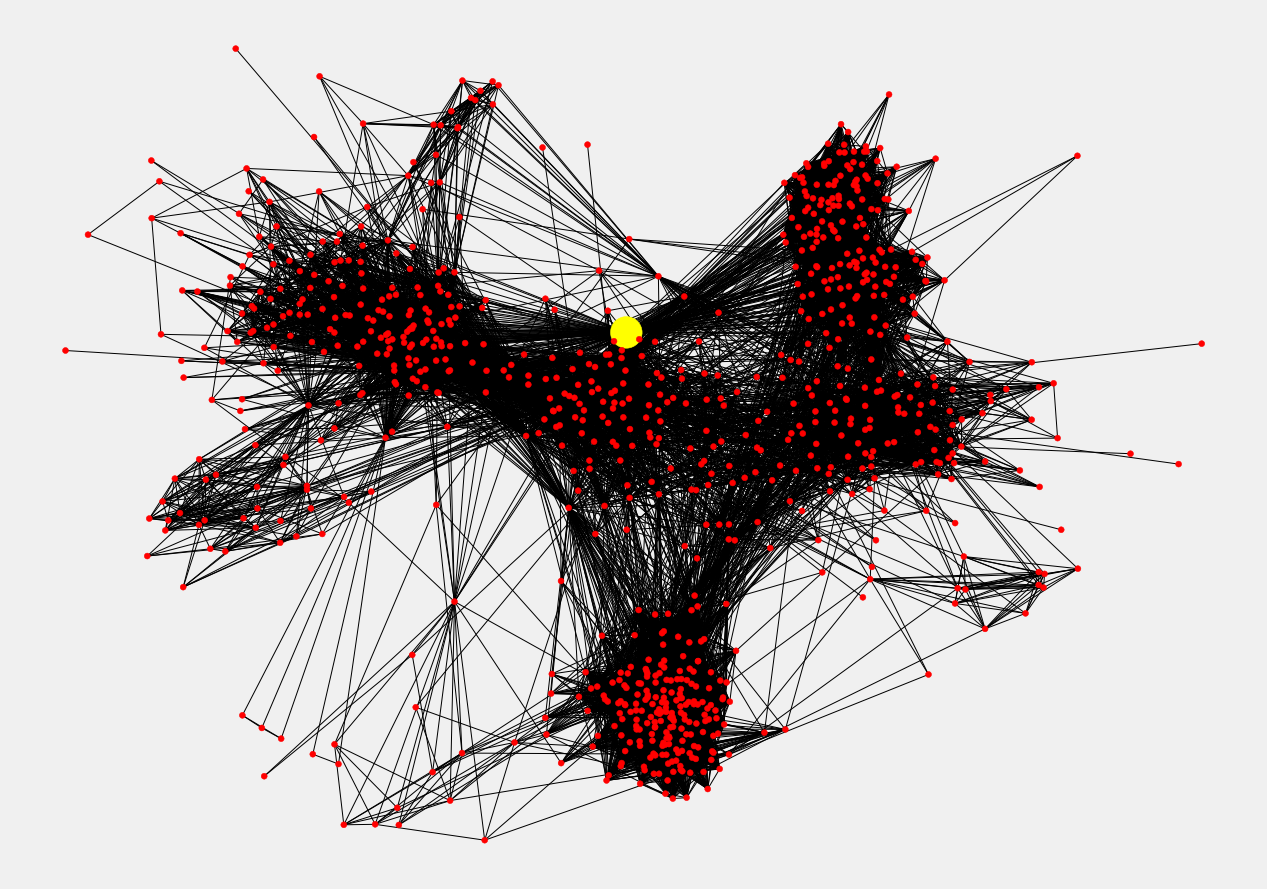

In [5]:
first_degree_connected_nodes = list(fb.neighbors(483))
second_degree_connected_nodes = []
for x in first_degree_connected_nodes:
    second_degree_connected_nodes+=list(fb.neighbors(x))
second_degree_connected_nodes.remove(483)
second_degree_connected_nodes = list(set(second_degree_connected_nodes))
subgraph_483 = nx.subgraph(fb,first_degree_connected_nodes+second_degree_connected_nodes)
pos = nx.spring_layout(subgraph_483)
node_color = ['yellow' if v == 483 else 'red' for v in subgraph_483]
node_size =  [1000 if v == 483 else 35 for v in subgraph_483]
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (20, 15)
plt.axis('off')
nx.draw_networkx(subgraph_483, pos, with_labels = False, node_color=node_color,node_size=node_size )
plt.show()

(-0.9660330061634484,
 0.8503928427418177,
 -1.0827729852985244,
 0.6935518522217676)

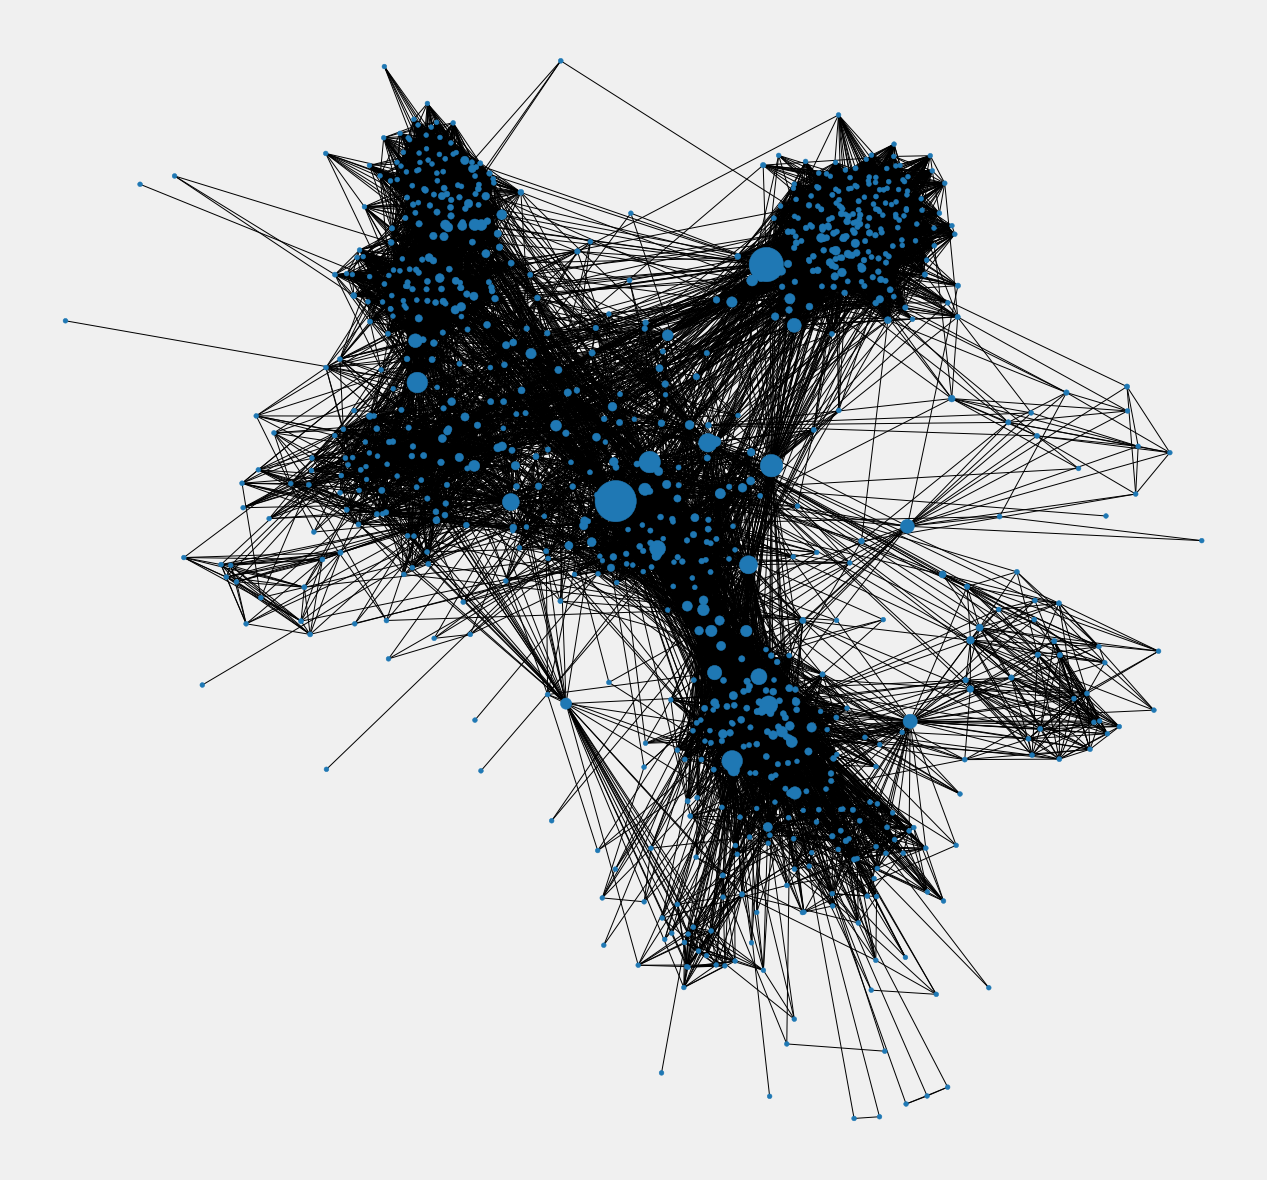

In [6]:
pos = nx.spring_layout(subgraph_483)
betweennessCentrality = nx.betweenness_centrality(subgraph_483,normalized=True, endpoints=True)
node_size =  [v * 10000 for v in betweennessCentrality.values()]
plt.figure(figsize=(20,20))
nx.draw_networkx(subgraph_483, pos=pos, with_labels=False,
                 node_size=node_size )
plt.axis('off')

In [76]:
import numpy as np

a = np.arange(8)
b = a[4:6]
b[:] = 40
c = a[4] + a[6]
c

46

In [10]:
import re
s = 'ABCAC'

In [11]:
len(re.split('A', s)) == 2

False

In [15]:
re.match('A', s) == True

False

In [17]:
bool(re.match('A', s)) == True

True

False

In [33]:
def result():
    s = 'ACAABAACAAABACDBADDDFSDDDFFSSSASDAFAAACBAAAFASD'

    result = []
    # compete the pattern below
    pattern = "\w(?=AAA)"
    for item in re.finditer(pattern, s):
      # identify the group number below.
      result.append(item.group())
      
    return result

result()

['C', 'F', 'B']

In [34]:
import pandas as pd

In [35]:
df = pd.Series({'d':4,'b':7})

In [36]:
df

d    4
b    7
dtype: int64

In [37]:
df['d']

4

In [39]:
df[0]

4

In [42]:
s1 = pd.Series({'m':20,'s':15, 'b':18, 'v':31 })

In [43]:
s1

m    20
s    15
b    18
v    31
dtype: int64

In [44]:
s2 = pd.Series({'s':20,'v':30, 'ban':15, 'v':31, 'm':20, 'p':20 })

In [45]:
s2

s      20
v      31
ban    15
m      20
p      20
dtype: int64

In [46]:
s3 = s1.add(s2)

In [47]:
s3

b       NaN
ban     NaN
m      40.0
p       NaN
s      35.0
v      62.0
dtype: float64

In [48]:
s3['p'] >= s3['m']

False

In [49]:
s3['b'] == s1.add(s2, fill_value = 0)['b']

False

In [50]:
s3['m'] >=  s1.add(s2, fill_value = 0)['m']

True

In [51]:
S = pd.Series(np.arange(5), index=['a', 'b', 'c', 'd', 'e'])

In [52]:
S

a    0
b    1
c    2
d    3
e    4
dtype: int64

In [53]:
S['b':'e']

b    1
c    2
d    3
e    4
dtype: int64

In [55]:
S[S <= 3][S > 0]

b    1
c    2
d    3
dtype: int64

In [74]:
import numpy as np
data = [['item1' , 'A' , 10], ['item1' , 'B' , 20],['item1' , 'c' , np.NaN], ['item2' , 'A' , 5], ['item2' , 'B' , 10], ['item2' , 'c' , 15]]
data

[['item1', 'A', 10],
 ['item1', 'B', 20],
 ['item1', 'c', nan],
 ['item2', 'A', 5],
 ['item2', 'B', 10],
 ['item2', 'c', 15]]

In [75]:
df = pd.DataFrame(pd.DataFrame(data, columns = ['Item', 'Store', 'Qantity Sold']) )
df.groupby('Item').sum().iloc[0]['Qantity Sold']

30.0

In [66]:
f = lambda x: x.max() + x.min()
df_new = df.apply(f)
df_new[1]

88

In [67]:
df.stack()

R1  a     5
    b     6
    c    20
R2  a     5
    b    82
    c    28
R3  a    71
    b    31
    c    92
R4  a    67
    b    37
    c    49
dtype: int64

In [104]:
multicol1 = pd.MultiIndex.from_tuples([('weight', 'kg'),
                                       ('weight', 'pounds')])
df_multi_level_cols1 = pd.DataFrame([[1, 2], [2, 4]],
                                    index=['cat', 'dog'],
                                    columns=multicol1)

In [105]:
df_multi_level_cols1

weight       
        kg pounds
cat      1      2
dog      2      4

In [106]:
df_multi_level_cols1.unstack().unstack()

cat  dog
weight kg        1    2
       pounds    2    4